# Decision Trees

Decision tree models, like probability tree diagrams, are structured as trees, where each node represents a simple decision point based on a specific feature, leading to branches that guide the model. Starting from the initial node, the model passes through the first decision point and follows a determined branch until reaching another decision point, and follows the same sequential steps until reaching a final point where there are no decisions left.

In this way, the model works like a funel, where possible outcomes are narrowed at each decision level, reaching to the final and unique outcome.
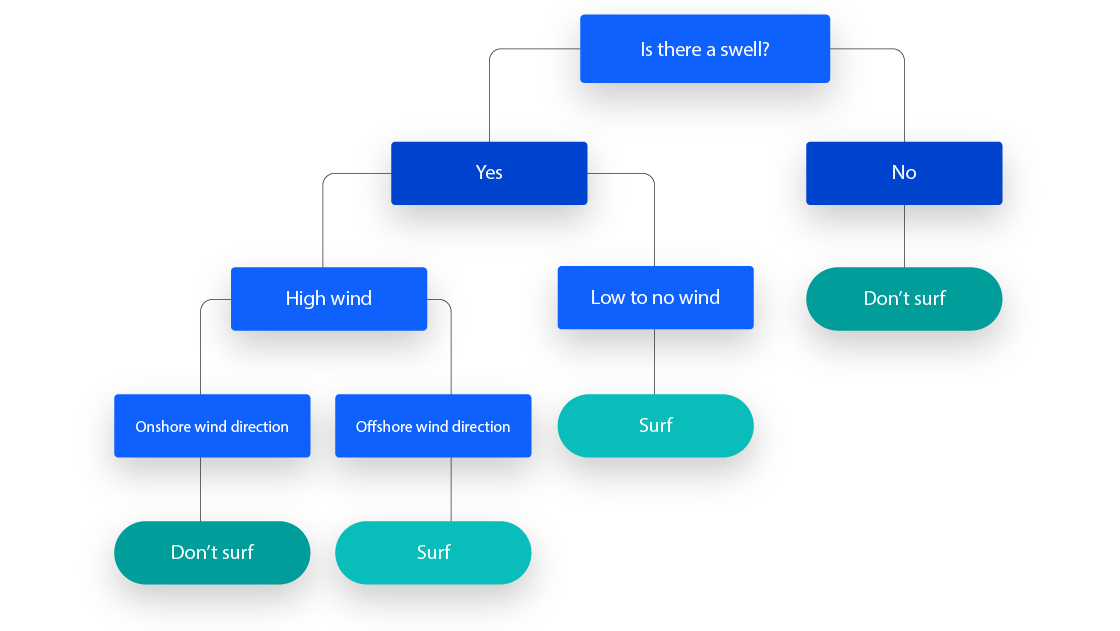

This simple case from [IBM](https://www.ibm.com/topics/decision-trees//) shows an example on how decisions trees are structured. In this case, we have 3 levels of decisions: the first one asking if there is a swell, the second one asking about the wind level, and the third one asking about the direction. The final outcome will define if it's possible to surf or not. All branches converge at some point to the final decision, but it might take the model to go through different decision levels depending on the path and prior decisions.

Decision trees models can work as classifiers or as regression models. To build a decision tree model, there are also some key hyperparameters to focus on when trying to tune the model for a better performance. The most common ones are:


*   Maximum depth: refers to the depth of the tree
*   Minimum Sample Split: the minimum number of samples required to split an internal node

*   Maximum features: the number of features to consider when looking for the best split
*   Maximum leaf nodes: limits the number of leaf nodes in the tree




# Application

The goal for this project is to build a Decision Tree Classifier that can say if a person will like or not a song based on previous experiences with different songs. The idea is to simulate how music platforms like Spotify may recommend songs based on similarities with liked songs.

**Dataset: Spotify Recommendations from Kaggle**

In [ ]:
!pip install -q kaggle

In [ ]:
!kaggle datasets download -d bricevergnou/spotify-recommendation

Dataset URL: https://www.kaggle.com/datasets/bricevergnou/spotify-recommendation
License(s): CC0-1.0
  0% 0.00/29.5k [00:00<?, ?B/s]
100% 29.5k/29.5k [00:00<00:00, 9.09MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile("spotify-recommendation.zip", 'r') as zip_ref:
    zip_ref.extractall("spotify_recommendation")

In [ ]:
import os
os.listdir("spotify_recommendation")


['good.json', 'dislike.json', 'data.csv', 'yes.py', 'no.py']

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("spotify_recommendation/data.csv")  # Adjust filename if different
df.head()


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.451,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.206,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.992,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.431,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.145,0.000000,0.0753,0.6470,155.117,179413,4,1


In [ ]:
df.columns.unique()


Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'liked'],
      dtype='object')

**Preliminary Visual Analysis**

To detect possible relations between songs' variables and the probability of the user liking them, we first proceed to build some graphs that can offer insights on this.

In [ ]:
# We import data visualization libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

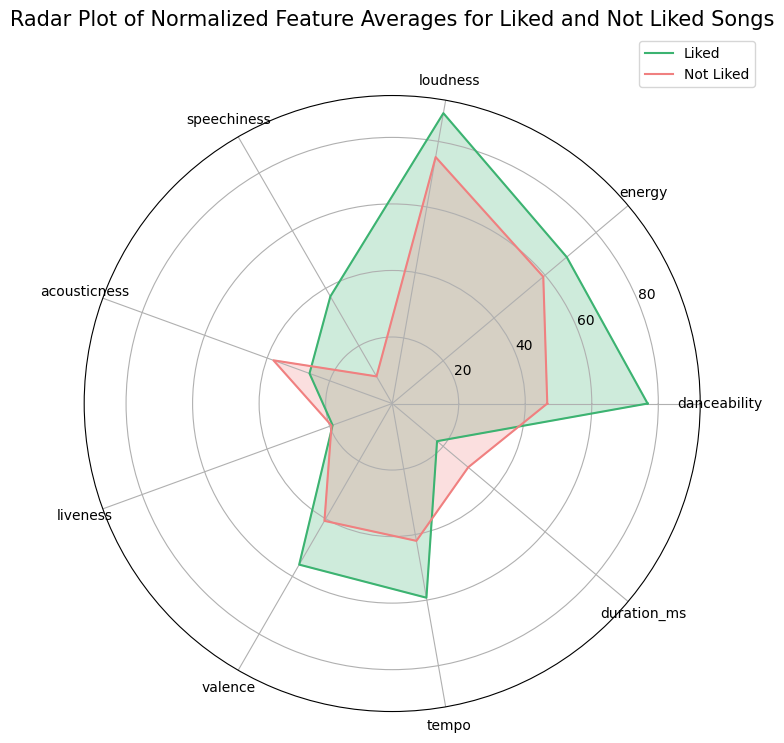

In [ ]:
# Radar plot with average features
continuous_features = ['danceability', 'energy', 'loudness', 'speechiness',
                       'acousticness', 'liveness', 'valence',
                       'tempo', 'duration_ms']
liked_avg = df[df['liked'] == 1][continuous_features].mean()
not_liked_avg = df[df['liked'] == 0][continuous_features].mean()

# Normalize values between 0 and 100 for each feature
min_vals = df[continuous_features].min()
max_vals = df[continuous_features].max()
liked_normalized = 100 * (liked_avg - min_vals) / (max_vals - min_vals)
not_liked_normalized = 100 * (not_liked_avg - min_vals) / (max_vals - min_vals)

# Prepare data for radar chart
liked_values = liked_normalized.values
not_liked_values = not_liked_normalized.values
num_vars = len(continuous_features)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
liked_values = np.concatenate((liked_values, [liked_values[0]]))
not_liked_values = np.concatenate((not_liked_values, [not_liked_values[0]]))
angles += angles[:1]

# Plotting the radar chart
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))
ax.plot(angles, liked_values, linewidth=1.5, linestyle='solid', label='Liked', color='mediumseagreen')
ax.fill(angles, liked_values, color='mediumseagreen', alpha=0.25)
ax.plot(angles, not_liked_values, linewidth=1.5, linestyle='solid', label='Not Liked', color='lightcoral')
ax.fill(angles, not_liked_values, color='lightcoral', alpha=0.25)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(continuous_features, fontsize=10)
plt.title("Radar Plot of Normalized Feature Averages for Liked and Not Liked Songs", size=15, color="black", y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.show()




<ipython-input-55-d8310e56a61d>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['liked'] == 1][feature], color="mediumseagreen", shade=True, label="Liked")
<ipython-input-55-d8310e56a61d>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['liked'] == 0][feature], color="lightcoral", shade=True, label="Not Liked")
<ipython-input-55-d8310e56a61d>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['liked'] == 1][feature], color="mediumseagreen", shade=True, label="Liked")
<ipython-input-55-d8310e56a61d>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become a

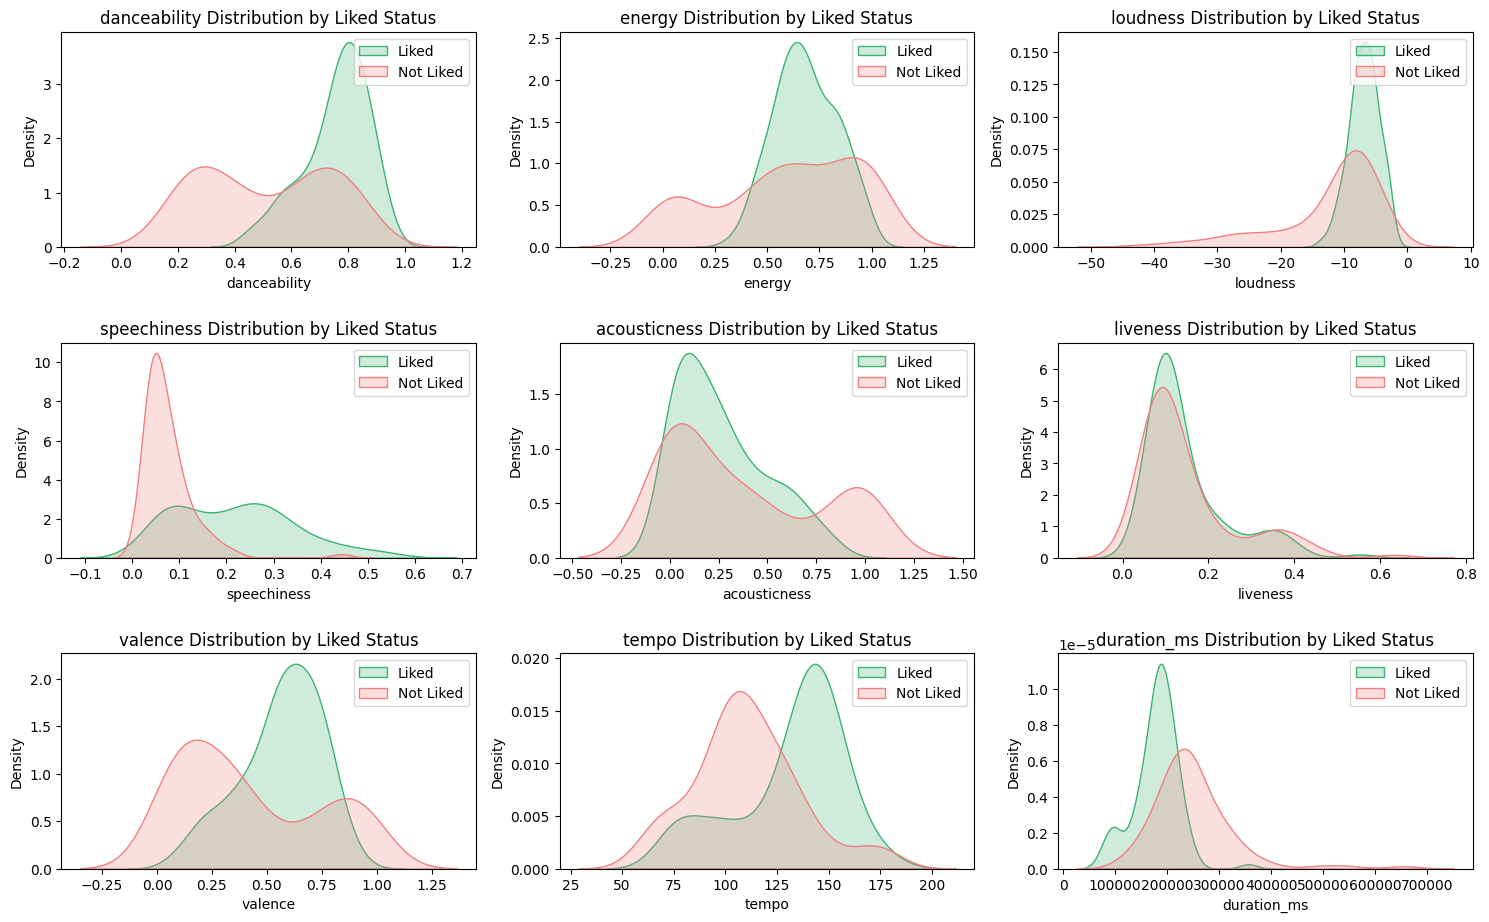

In [ ]:
# Distribution of features based on liked and not liked songs
continuous_features = ['danceability', 'energy', 'loudness', 'speechiness',
                       'acousticness', 'liveness', 'valence',
                       'tempo', 'duration_ms']

plt.figure(figsize=(15, 12))
for i, feature in enumerate(continuous_features, 1):
    plt.subplot(4, 3, i)
    sns.kdeplot(df[df['liked'] == 1][feature], color="mediumseagreen", shade=True, label="Liked")
    sns.kdeplot(df[df['liked'] == 0][feature], color="lightcoral", shade=True, label="Not Liked")
    plt.title(f'{feature} Distribution by Liked Status')
    plt.legend()
plt.tight_layout()
plt.show()


From the radar plot and the features' distribution plots, we can see a distinguished difference particularly for 'danceability' and 'tempo'. Let's focus on this two variables to build our first model. Let's get started by making a scatterplot with these 2 features and distinguishing between liked and not liked songs.

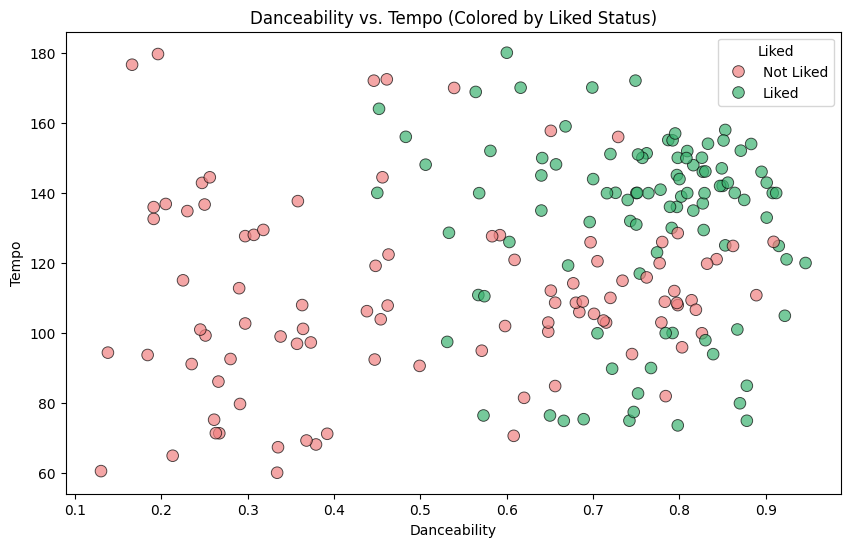

In [ ]:
# Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='danceability',
    y='tempo',
    hue='liked',
    palette={1: 'mediumseagreen', 0: 'lightcoral'},  # Set colors for liked and not liked
    s=70,
    edgecolor='k',
    alpha=0.7
)
plt.xlabel('Danceability')
plt.ylabel('Tempo')
plt.title('Danceability vs. Tempo (Colored by Liked Status)')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=['Not Liked', 'Liked'], title='Liked', loc='upper right')
plt.show()



**Decision Tree Classifier**

For the model, we will start by importing the DecisionTreeClassifier from sklearn. The idea of this model will be to predict if the user will like or not the song based on 'danceability' and 'tempo' features.

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("spotify_recommendation/data.csv")

# We select features and target variable
X = df[['danceability', 'loudness']]
y = df['liked']

# We split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the Decision Tree model
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate the model with R2
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))



Accuracy: 0.73
              precision    recall  f1-score   support

           0       0.80      0.57      0.67        28
           1       0.69      0.87      0.77        31

    accuracy                           0.73        59
   macro avg       0.75      0.72      0.72        59
weighted avg       0.74      0.73      0.72        59



The model obtained an accuracy of 73%. This result is not great, but at least it is better than throwing a coin. Let's study how this model is making the decisions to classify songs between 'Liked' and 'Not great'.

First of all, let's build the Decision Tree to understand how this model is structured and what decision points it is contemplating to define the outcome.

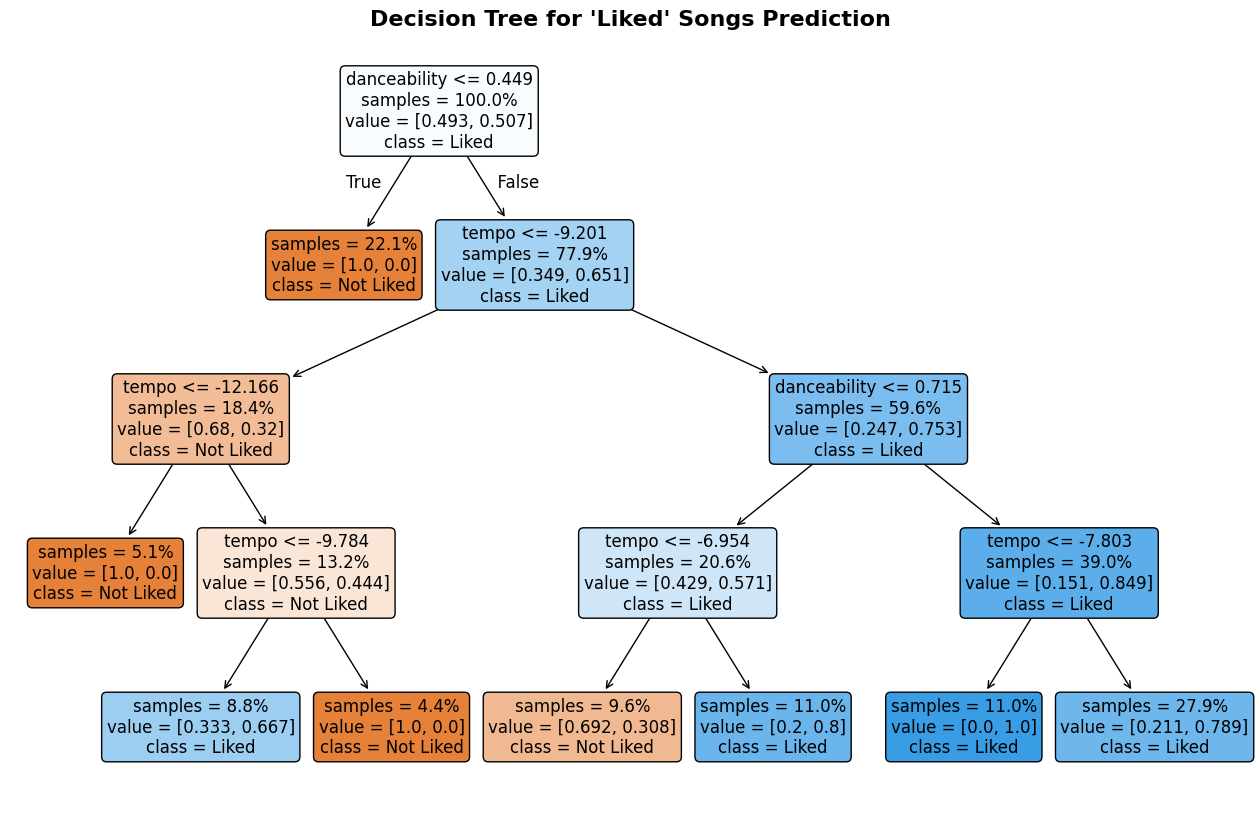

In [ ]:
# Decision Tree
fig, ax = plt.subplots(figsize=(16, 10))

plot_tree(
    clf,
    feature_names=['danceability', 'tempo'],
    class_names=['Not Liked', 'Liked'],
    filled=True,
    rounded=True,
    impurity=False,
    fontsize=12,
    ax=ax,
    proportion=True
)

# Set title
plt.title("Decision Tree for 'Liked' Songs Prediction", fontsize=16, fontweight='bold')

# Show the plot
plt.show()


We can see that the model has four decision levels, or a maximum depth of 4.

In [ ]:
from sklearn.tree import export_text
features = ['danceability', 'tempo']
tree_rules = export_text(clf, feature_names=features)
print(tree_rules)


|--- danceability <= 0.45
|   |--- class: 0
|--- danceability >  0.45
|   |--- tempo <= -9.20
|   |   |--- tempo <= -12.17
|   |   |   |--- class: 0
|   |   |--- tempo >  -12.17
|   |   |   |--- tempo <= -9.78
|   |   |   |   |--- class: 1
|   |   |   |--- tempo >  -9.78
|   |   |   |   |--- class: 0
|   |--- tempo >  -9.20
|   |   |--- danceability <= 0.72
|   |   |   |--- tempo <= -6.95
|   |   |   |   |--- class: 0
|   |   |   |--- tempo >  -6.95
|   |   |   |   |--- class: 1
|   |   |--- danceability >  0.72
|   |   |   |--- tempo <= -7.80
|   |   |   |   |--- class: 1
|   |   |   |--- tempo >  -7.80
|   |   |   |   |--- class: 1



Let's analyze how the model is delimitating the X,Y areas to ensure that there is no overfitting.

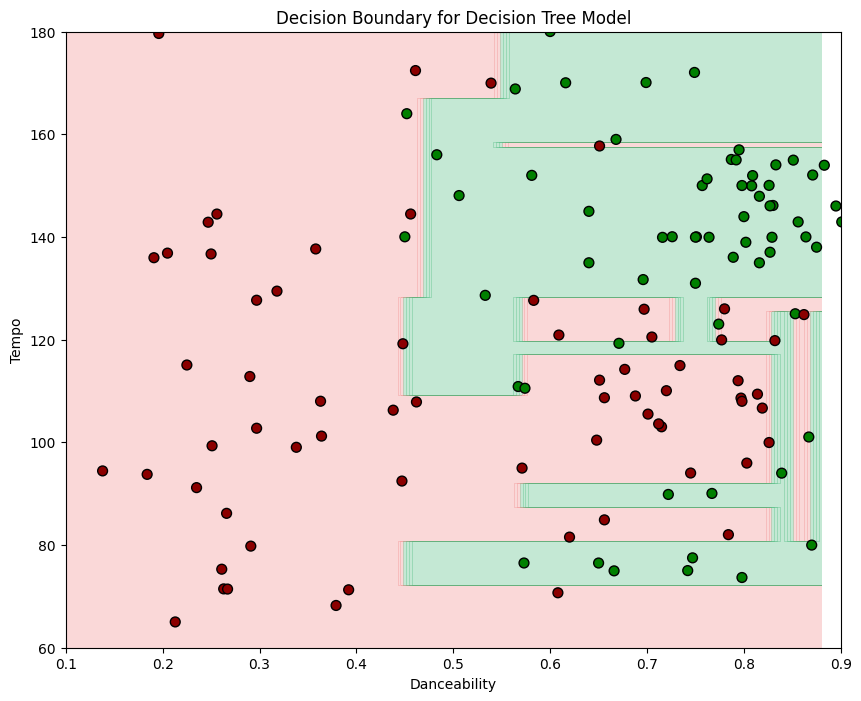

In [ ]:

features = ['danceability', 'tempo']
X = df[features].values
y = df['liked'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Define the step size and create a mesh grid with the same x and y limits as the scatter plot
plot_step = 0.02
x_min, x_max = 0.1, 0.9  # Set these limits based on the scatter plot's x-axis range
y_min, y_max = 60, 180   # Set these limits based on the scatter plot's y-axis range
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

# Predict over the mesh grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Define custom colormap
cmap_background = ListedColormap(['lightcoral', 'mediumseagreen'])
cmap_points = ListedColormap(['darkred', 'green'])

# Plot the decision boundary with custom colors and the same scales as the scatter plot
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor="k", s=50, cmap=cmap_points)
plt.xlabel("Danceability")
plt.ylabel("Tempo")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.title("Decision Boundary for Decision Tree Model")
plt.show()





We can see in the graph that there is overfitting. We can deal with overfitting by reducing the maximum depth to 3, instead of 4.

**Varying maximum depth**

In [ ]:
df = pd.read_csv("spotify_recommendation/data.csv")

# We select features and target variable
X = df[['danceability', 'loudness']]
y = df['liked']

# We split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the Decision Tree model with a maximum depth of 3
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate the model with R2
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.79      0.82      0.81        28
           1       0.83      0.81      0.82        31

    accuracy                           0.81        59
   macro avg       0.81      0.81      0.81        59
weighted avg       0.81      0.81      0.81        59



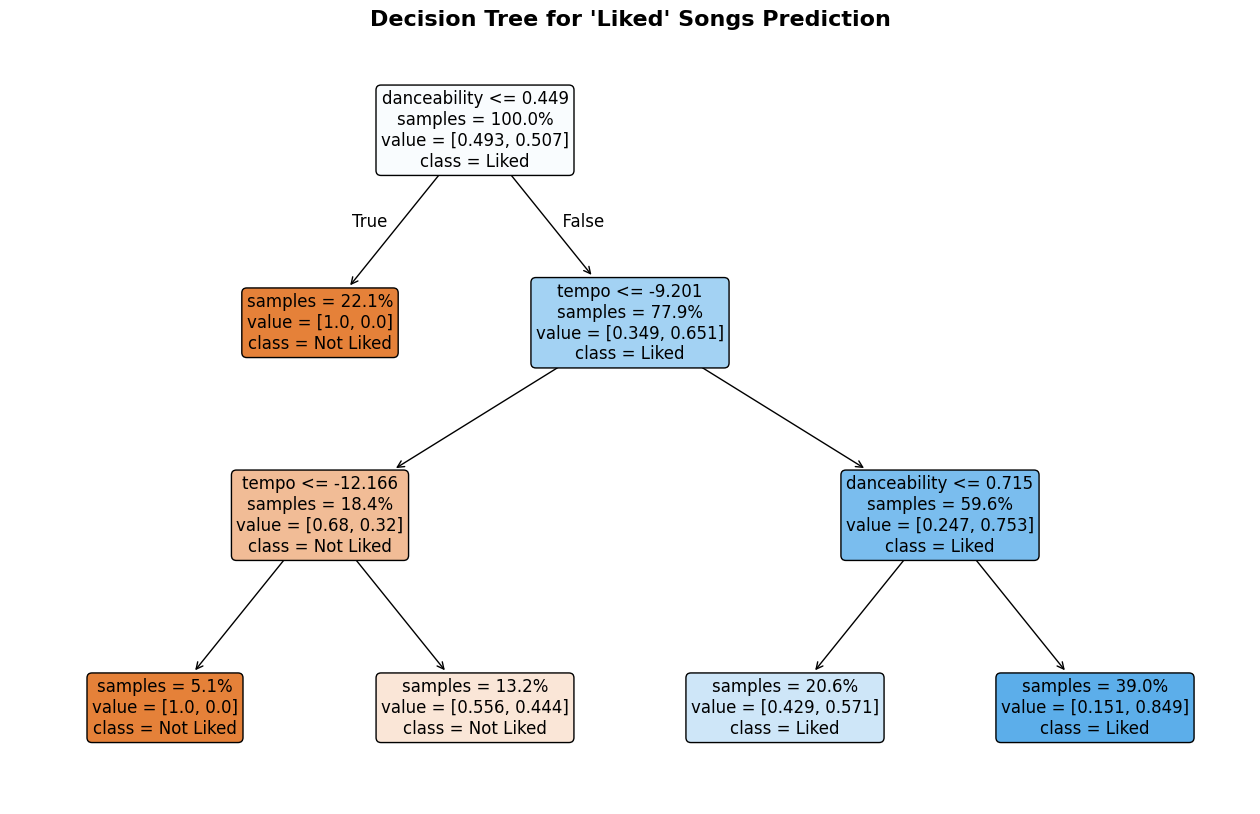

In [ ]:
# Decision Tree
fig, ax = plt.subplots(figsize=(16, 10))

plot_tree(
    clf,
    feature_names=['danceability', 'tempo'],
    class_names=['Not Liked', 'Liked'],
    filled=True,
    rounded=True,
    impurity=False,
    fontsize=12,
    ax=ax,
    proportion=True
)

# Set title
plt.title("Decision Tree for 'Liked' Songs Prediction", fontsize=16, fontweight='bold')

# Show the plot
plt.show()

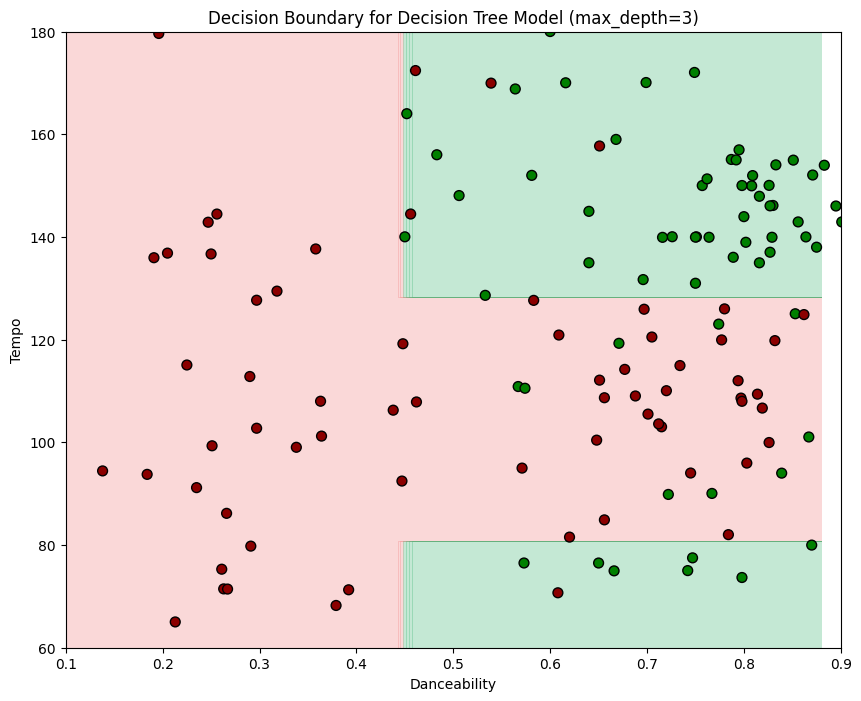

In [ ]:

features = ['danceability', 'tempo']
X = df[features].values
y = df['liked'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Decision Tree Classifier with max depth of 3
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Define the step size and create a mesh grid with the same x and y limits as the scatter plot
plot_step = 0.02
x_min, x_max = 0.1, 0.9  # Set these limits based on the scatter plot's x-axis range
y_min, y_max = 60, 180   # Set these limits based on the scatter plot's y-axis range
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

# Predict over the mesh grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Define custom colormap
cmap_background = ListedColormap(['lightcoral', 'mediumseagreen'])
cmap_points = ListedColormap(['darkred', 'green'])

# Plot the decision boundary with custom colors and the same scales as the scatter plot
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor="k", s=50, cmap=cmap_points)
plt.xlabel("Danceability")
plt.ylabel("Tempo")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.title("Decision Boundary for Decision Tree Model (max_depth=3)")
plt.show()



This model looks better and doesn't show signs of overfitting. The accuracy has also improved to 81%.



**Confusion Matrix**

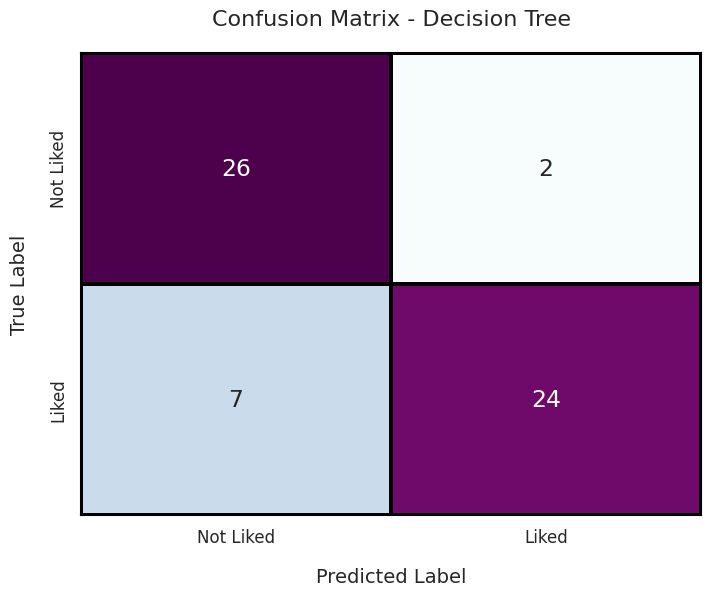

In [ ]:
from sklearn.metrics import confusion_matrix

# Define labels
labels = ['Not Liked', 'Liked']

# Predict using the decision tree
y_pred = clf.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Convert confusion matrix into a DataFrame
matrix_df = pd.DataFrame(conf_matrix, index=labels, columns=labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid", font_scale=1.4)
ax = sns.heatmap(matrix_df, annot=True, fmt='g', cmap="BuPu", cbar=False, linewidths=1.5, linecolor='black')

# Set titles and labels
ax.set_title('Confusion Matrix - Decision Tree', fontsize=16, pad=20)
ax.set_xlabel('Predicted Label', fontsize=14, labelpad=15)
ax.set_ylabel('True Label', fontsize=14, labelpad=15)
ax.tick_params(axis='both', which='major', labelsize=12)

# Add border for visual appeal
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(1.5)

plt.show()


By looking at the confusion matrix, we can see that the model correctly predicted 26 true negatives and 24 true positives.

In [ ]:
from sklearn import metrics
precision = metrics.precision_score(y_test, y_pred, average=None)
labels = ['Not Liked', 'Liked']
precision_results = pd.DataFrame(precision, index=labels, columns=['Precision'])
print("Precision Score for each class:")
precision_results

Precision Score for each class:


,Precision
Not Liked,0.787879
Liked,0.923077


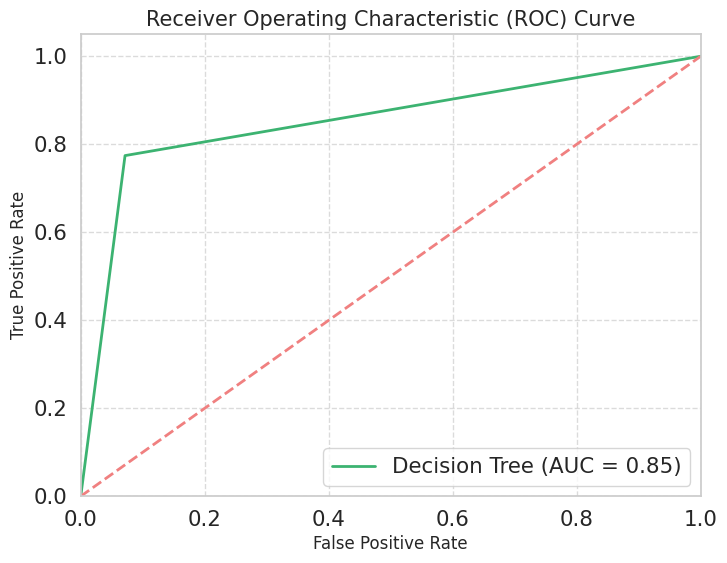

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculate the ROC AUC score
dt_roc_auc = roc_auc_score(y_test, y_pred)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='mediumseagreen', linewidth=2, label='Decision Tree (AUC = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1], color='lightcoral', linestyle='--', linewidth=2)

# Set axis limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=15)
plt.legend(loc="lower right")

# Display the plot
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
